In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')

In [8]:
# Drop CustomerID and encode Gender
df_clean = df.drop(columns=['CustomerID'])
if 'Gender' in df_clean.columns:
    df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})

In [4]:
# PART 1: Only Age & Spending Score
X_selected = df_clean[['Age', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


In [5]:
# Fit KMeans with 3 clusters for demo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)


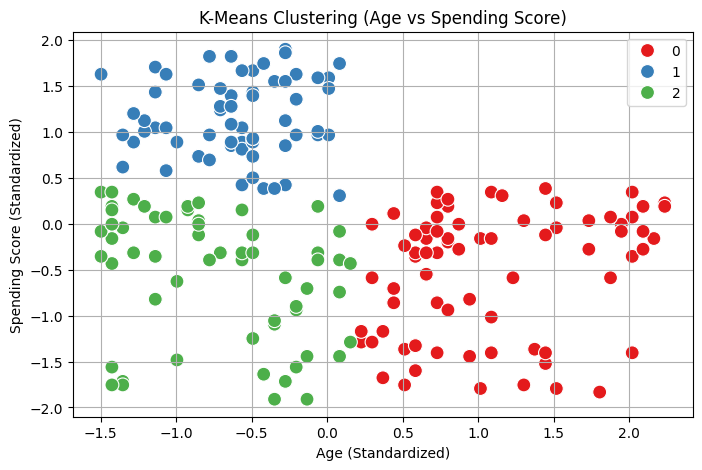

In [6]:
# Plot 2D KMeans Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set1', s=100)
plt.title("K-Means Clustering (Age vs Spending Score)")
plt.xlabel('Age (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.grid(True)
plt.show()

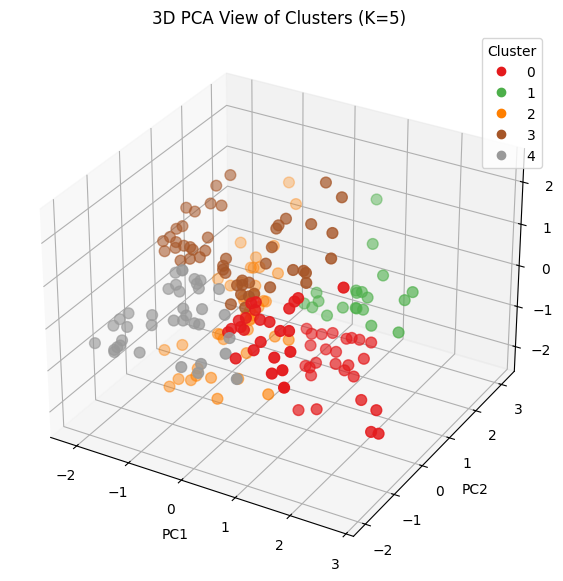

In [9]:
# PART 2: 3D PCA Visualization
full_scaler = StandardScaler()
X_all_scaled = full_scaler.fit_transform(df_clean)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_all_scaled)

kmeans_3d = KMeans(n_clusters=5, random_state=42)
labels_3d = kmeans_3d.fit_predict(X_all_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=labels_3d, cmap='Set1', s=60)
ax.set_title("3D PCA View of Clusters (K=5)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

In [10]:
# PART 3: DBSCAN Clustering on Age & Spending Score
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)


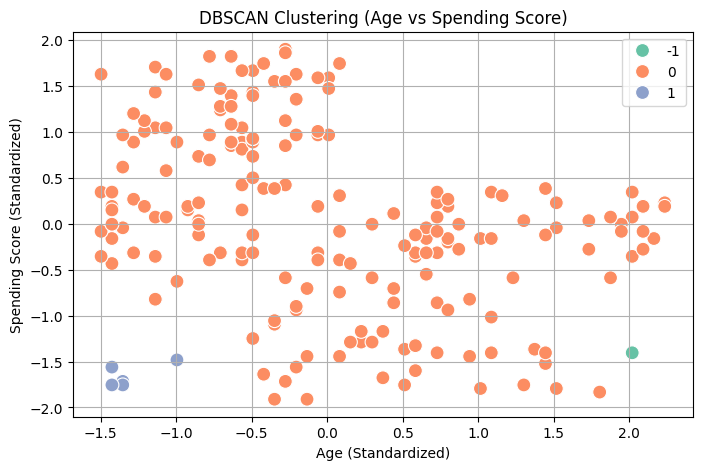

In [11]:
# Plot DBSCAN Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=db_labels, palette='Set2', s=100)
plt.title("DBSCAN Clustering (Age vs Spending Score)")
plt.xlabel('Age (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.grid(True)
plt.show()


In [12]:
# Evaluate Silhouette Scores
if len(set(kmeans_labels)) > 1:
    print(f"KMeans Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.4f}")
if len(set(db_labels)) > 1 and -1 in db_labels:
    print(f"DBSCAN Silhouette Score (excluding noise): {silhouette_score(X_scaled[db_labels != -1], db_labels[db_labels != -1]):.4f}")

KMeans Silhouette Score: 0.4314
DBSCAN Silhouette Score (excluding noise): 0.2533
